# Introduction
Density-Based Spatial Clustering of Applications with Noise (DBSCAN), is a data clustering algorithm that works by identifying clusters of high density points separated by regions of low density. Unlike K-Means or GMMs that rely on distances or predefined centres, DBSCAN focuses on the density of points to group them.

### Density based clustering
DBSCAN does not require pre-defining the number of clusters or specifying initial centroids. It discovers clusters based on how closely packed the data points are in a specific area.

### Outlier handling
DBSCAN excels at identifying outlier because points with few neighbors are classified as noise, making it robust to data with outliers.

### Flexible clustering
DBSCAN isn't limited to spherical clusters like K-Means. It can effectlvely handle clusters of arbitrary shapes, such as elongated or crescent-shaped ones.

### Intuition behind DBSCAN
Unlike K-Means and GMMs, which rely on distance metrics, DBSCAN focuses on the density of points to identify clusters. This makes it adept at handling datasets with outliers or clusters of irregular shapes.

Imagine a dataset visualized as points of a graph. Dense regions with many neighboring points likely represent clusters, while isolated points could be outliers. DBSCAN leverages this intuition to group points.

### Advantages
- Robust to outliers: DBSCAN can effectively identify outliers due to its density-based approach.
- Flexible cluster shapes: It can handle clusters of arbitrary shapes, unlike K-Means which assumes spherical clusters.

### Disadvantages
- Parameter sensitivity: The performance of DBSCAN is highly dependent on choosing the appropriate values for epsilon (`eps`) and minimum data points (`min_samples`).
- High time complexity: The time complexity of DBSCAN can be higher compared to K-Means, especially for large datasets.

# Terminology in DBSCAN
DBSCAN operates on a unique principle: identifying clusters based on the density of data points.

### Core points
- Imagine a data point, p.
- Epsilon (`eps`): This parameter defines a radius around p. Think of it as a circle or sphere (hypersphere in higher dimension) centered at p.
- Density at p: This refers to the number of points within the epsilon-neighborhood of p. In simpler terms, it captures how many other data points are close to p.
- A point p is crowned a core point if the density at p (the number of points within its epsilon-neighborhood) is greater than or equal to the minimum points parameter (`min_samples`). Essentially, a core point has a high concentration of neighbors around it, suggesting it resides within a dense region.

### Border points
Not all points fall neatly into the core category. Some exist on the outskirts of clusters. A border point is a point that,
- Is not a core point itself. It does not have enough points in its own epsilon-neighborhood to meet the `min_samples` criteria and be classified as a core point.
- Lies within the epsilon-neighborhood of a core point. It benefits from the density of a nearby core point, even though it does not have a high density of neighbors itself.
- Think of border points like those living in the suburbs of a city - ther're close to a densely populated area (the core point), but their own neighborhood might be less populated.

### Outliers (or noise)
- Data can have isolated points that do not seem to belong to any well defined cluster.
- Points that are neither core points nor border points are classified as outliers or noise.
- These points typically have low density around them (fewer than `min_samples` neighbors within `eps`). They are the loners of the dataset, far away from the hustle and bustle of the clusters.

### Hyperparameters
DBSCAN's performance relies heavily on 2 crucial hyperparameters,
- `min_samples`: This defines the minimum number of neighbors a point needs to be considered a core point. Setting `min_samples` too high might break up the clusters, while setting it too low might include noise points as core points.
- `eps`: This defines the radius of the neighborhood around a point. A small `eps` might miss the points that truly belong to the same cluster, while a large `eps` might merge distinct clusters together. Choosing the right `eps` like picking the perfect zoom level on a map - the details of the cluster should be clearly visible without getting lost in the bigger picture.

### Density edges
Density edge refers to a connection between two data points (vertices) where the distance betweent them is less than or equal to `eps`. It is essentially a line segment connecting 2 points within each other's epsilon-neighborhood. Imagine 2 friends living close enough to walk to each other's house - that is a density edge.

### Density connected points
This concept extends the idea of density edges. Imagine 2 points, p and q, that might be far apart directly. However, if there's a chain of points between them, each connected by density edges (less than `eps` apart), then p and q are considered to be density connected. This captures the notion of clusters that might be elongated or have sparse regions within them. Think of a long winding road connecting 2 towns - even though the towns themselves might be far apart, they are connected by the road (the chain of density connected points).

# DBSCAN Algorithm
1. The `eps` and `min_samples` are decided. Using these, each data point in the dataset is labeled as either a core point, border point, or noise point.
2. The noise points are removed from the dataset.
3. The core points at this instance are not assigned to any cluster. Therefore, for each core point that is not yet assigned to any cluster,
    - create a new cluster with point P
    - add all points that are density connected to point P, the the P's cluster
    - this is done for all the core points
4. After step 3 completes, there will be some border points left. These border points are assigned to the nearest cluster.

# Hyperparameters in DBSCAN
DBSCAN unlike K-Means and GMM, does not require pre-defining the number of clusters. However, it relies on 2 crucial hyperparameters to function effectively.
1. Epsilon (`eps`): This parameter defines the radius of a neighborhood around a data point. It essentially determined how far DBSCAN looks for other points to be considered as neighbors. Impact,
    - A small `eps` might miss points that truly belong to the same cluster, especially in high dimensional data.
    - A large `eps` might merge distinct clusters together, leading to inaacurate cluster information.
2. Minimum points (`min_samples`): This parameter specifies the minimum number of neighbors a point needs to be classified as a core point (a point likely belonging to a dense region). Impact,
    - A high `min_samples` value might break up the clusters, particulary for clusters with fewer points as some points might not have enough neighbors to qualify as core points.
    - A low `min_samples` value might include noise point (outliers) as core points, leading to inaccurate clusters.

### How to choose the right values?
There is no one size fits all solution for `eps` and `min_samples`. The optimal values depend on several factors, including,
- The nature of the data: The density distribution and dimensionality of the data can influence the choice of parameters.
- Desired cluster granualarity: A smaller `eps` and a higher `min_samples` might result in more fine-grained clusters, while `eps` and lower `min_samples` might lead to fewer broader clusters.

### General guidelines for choosing hyperparameters
- Epsilon (`eps`): It is often recommended to start with a small value and gradually increase it until reasonable cluster separation is observed. Visualizing the data can help with this process.
- Minimum points (`min_samples`): A good starting point can be twice the dimensionality of your data (assuming a full covariance matrix). It can then be adjusted later based on the desired cluster granualarity and the density of the data.

# Implementation of DBSCAN

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# configuring the notebook
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

In [3]:
# importing the dataset
df = pd.read_csv("wholesaledata.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.shape

(440, 8)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [7]:
# dropping the "Channel" and "Region" columns
df.drop(columns = ["Channel", "Region"], inplace = True)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


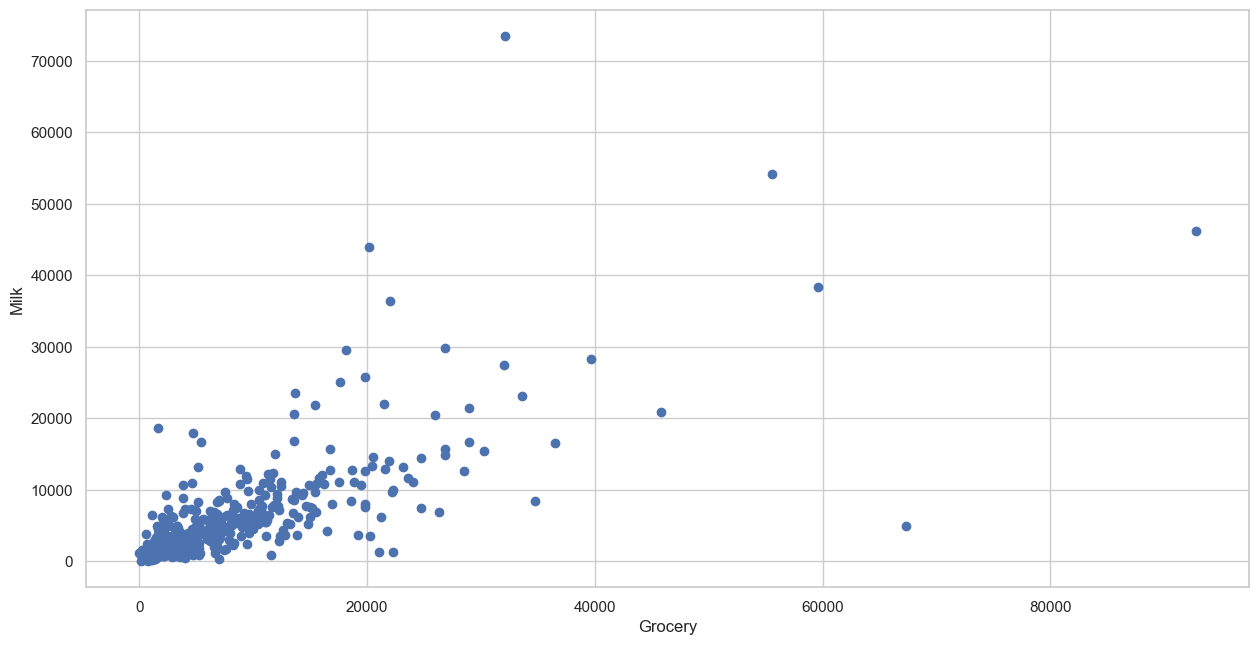

In [8]:
# plotting a scatter plot of "Grocery" and "Milk"
plt.figure(figsize = (15, 7.5))
plt.scatter(df["Grocery"], df["Milk"])
plt.xlabel("Grocery")
plt.ylabel("Milk")
plt.show()

In [9]:
# creating a dataset with only "Grocery" and "Milk" columns
df_1 = df[["Grocery", "Milk"]]
df_1.head()

,Grocery,Milk
0,7561,9656
1,9568,9810
2,7684,8808
3,4221,1196
4,7198,5410


In [10]:
# scaling df_1 using StandardScaler()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_1 = scaler.fit_transform(df_1)
df_1

array([[-4.11148934e-02,  5.23567773e-01],
       [ 1.70318354e-01,  5.44457667e-01],
       [-2.81571010e-02,  4.08537706e-01],
       [-3.92976899e-01, -6.24019925e-01],
       [-7.93561833e-02, -5.23964546e-02],
       [-2.97637045e-01,  3.34066589e-01],
       [-1.02848766e-01, -3.52315651e-01],
       [ 1.55358951e-01, -1.13980948e-01],
       [-1.85336177e-01, -2.91409401e-01],
       [ 1.15142340e+00,  7.18494904e-01],
       [ 5.29133322e-01, -5.33459952e-02],
       [-3.61161832e-01, -6.33786629e-01],
       [ 4.00924920e-01,  8.84800166e-01],
       [ 7.40671917e-01,  5.58511794e-02],
       [ 4.36111121e-01,  4.97658878e-01],
       [-4.35116062e-01, -6.35143116e-01],
       [ 4.39271558e-01,  4.09622895e-01],
       [-5.28665002e-01,  4.89330975e-02],
       [ 2.26258092e-01,  7.19933704e-02],
       [ 1.59362172e-01, -4.47812310e-01],
       [-3.52839347e-01, -1.73259414e-01],
       [-6.25901120e-01, -6.68105741e-01],
       [-3.66850619e-01, -5.26217238e-01],
       [ 1.

In [11]:
# creating clusters using DBSCAN
from sklearn.cluster import DBSCAN

model = DBSCAN(eps = 0.5, min_samples = 15)
model.fit(df_1)

DBSCAN(min_samples=15)

In [12]:
labels = model.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

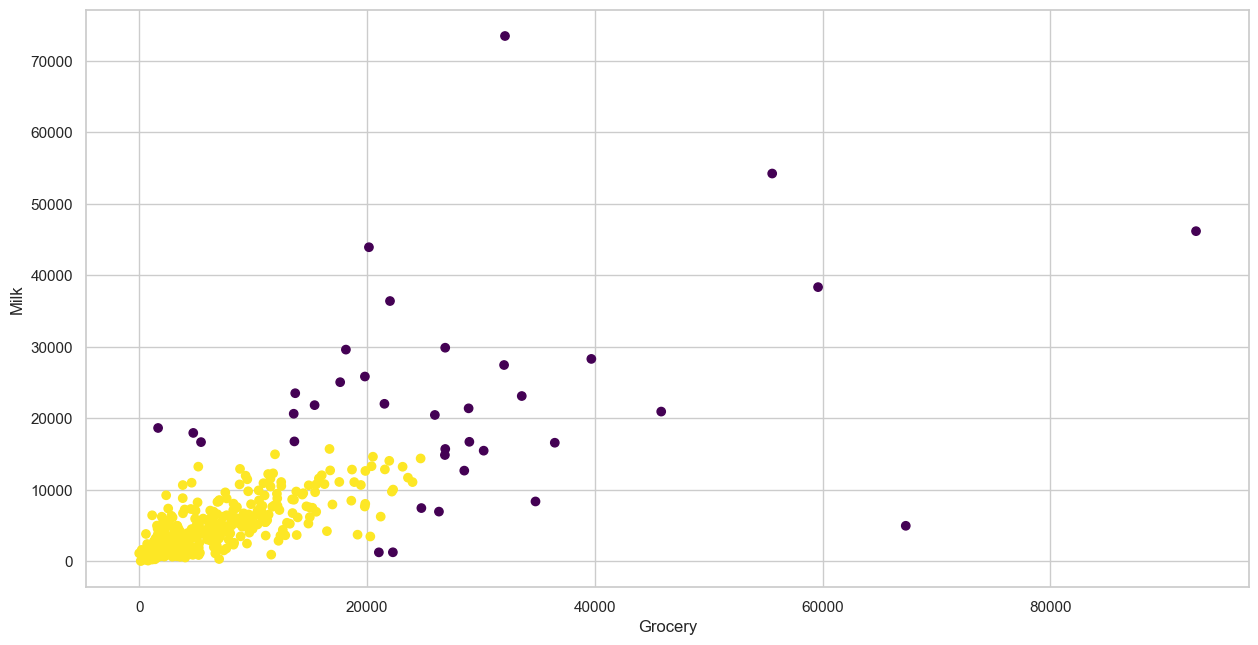

In [13]:
# plotting a scatter plot of "Grocery" and "Milk"
plt.figure(figsize = (15, 7.5))
plt.scatter(df["Grocery"], df["Milk"], c = labels, cmap = "viridis")
plt.xlabel("Grocery")
plt.ylabel("Milk")
plt.show()